### Loading dataset

In [1]:
import pandas as pd

df= pd.read_excel("TrainDataset2024.xls")
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


## Data Preprocessing

In [4]:
df = df.rename(columns={"pCR (outcome)": "PCR"})

In [5]:
import numpy as np
df.replace(999, np.nan, inplace= True)
null = df.isna().sum().sum()
print("Number of null values: ",null)

Number of null values:  105



=== Features with Missing Values ===
PCR                 5
PgR                 1
HER2                1
TrippleNegative     1
ChemoGrade          3
Proliferation       2
HistologyType       3
LNStatus            1
Gene               88
dtype: int64


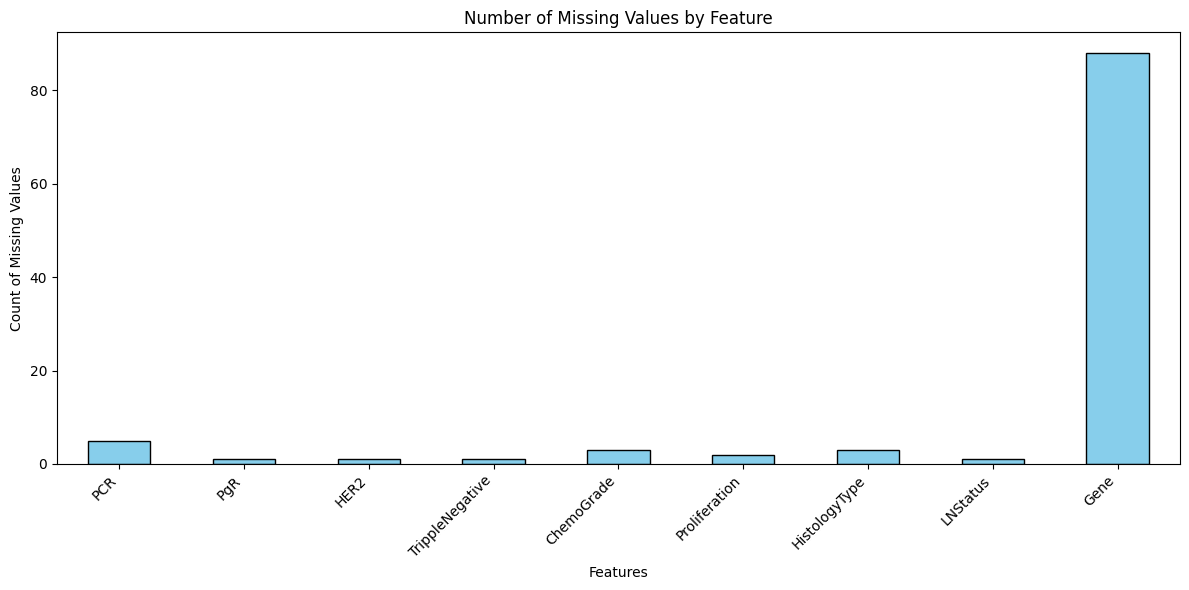


=== Overall Missing Data Summary ===
Total number of missing values: 105
Total number of cells in dataset: 48400
Percentage of missing data: 0.22%


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace 999 with NaN for further analysis
df.replace(999, np.nan, inplace=True)

# Count missing (999) values in each column
missing_counts = (df.isna().sum())

# Filter out columns with no missing values
missing_counts = missing_counts[missing_counts > 0]

# Display feature names and missing value counts
print("\n=== Features with Missing Values ===")
print(missing_counts)

# Visualize the distribution of missing values
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summary statistics
total_missing = missing_counts.sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100

print("\n=== Overall Missing Data Summary ===")
print(f"Total number of missing values: {total_missing}")
print(f"Total number of cells in dataset: {total_cells}")
print(f"Percentage of missing data: {missing_percentage:.2f}%")


In [7]:
import pandas as pd

# List of features you want to modify
features_to_modify = [
    "PCR", "PgR", "HER2", "TrippleNegative", "ChemoGrade", 
    "Proliferation", "HistologyType", "LNStatus", "Gene"
]

# Loop through the columns and replace NaN values with the mode of each column
for feature in features_to_modify:
    mode_value = df[feature].mode()[0]  # Get the mode of the feature
    df[feature].fillna(mode_value, inplace=True)  # Replace NaN with the mode

# Check the changes
print(df[features_to_modify].isna().sum())  # Check how many NaN values are left


PCR                0
PgR                0
HER2               0
TrippleNegative    0
ChemoGrade         0
Proliferation      0
HistologyType      0
LNStatus           0
Gene               0
dtype: int64


C:\Users\LLR User\AppData\Local\Temp\ipykernel_14388\4226577187.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(mode_value, inplace=True)  # Replace NaN with the mode


In [8]:
df = df.drop('ID', axis=1)

In [9]:
# Calculate Z-scores for the entire dataset
z_scores = np.abs((df - df.mean()) / df.std())

# Identify rows that have z-scores above the threshold (3 in this case)
outliers = (z_scores > 3).any(axis=1)

# Print the number of outliers
print(f"Number of outliers: {outliers.sum()}")

# Remove outliers from the dataset
df_no_outliers = df[~outliers]

print(f"Number of outliers: {df_no_outliers.sum()}")

Number of outliers: 87
Number of outliers: PCR                                 65.000000
RelapseFreeSurvival (outcome)    17185.083333
Age                              16080.576595
ER                                 166.000000
PgR                                126.000000
                                     ...     
original_ngtdm_Busyness          36656.435955
original_ngtdm_Coarseness            4.608712
original_ngtdm_Complexity           18.424557
original_ngtdm_Contrast              1.797244
original_ngtdm_Strength              4.089319
Length: 120, dtype: float64


### Feature Selection

In [10]:
df1 = df.copy()
# checking for correlated features of dataset
def correlation(data, threshold):
    col_corr = {}  # Dictionary to store correlated features
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute coefficient value
                colname = corr_matrix.columns[i]
                if colname not in col_corr:
                    col_corr[colname] = set()
                col_corr[colname].add(corr_matrix.columns[j])

    return col_corr

corr_features = correlation(df1, 0.8)
print('correlated features: ', len(corr_features))

correlated features:  82


In [11]:
# removing the correlated features
df_corr= df1.drop(labels=corr_features, axis=1)
df_corr.shape

(400, 38)

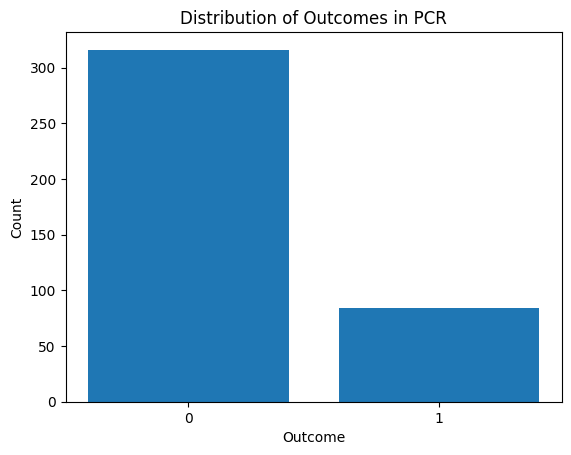

In [12]:
# checking the count of target values after data processing and feature selection
outcomes = df_corr['PCR'].value_counts()
outcome_labels =['0','1']
outcome_values = outcomes.values
plt.bar(outcome_labels, outcome_values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcomes in PCR')
plt.show()

In [13]:
# dataset using correlated feature selection
X_corr = df_corr.drop(["PCR","RelapseFreeSurvival (outcome)"],axis=1)
y_corr = df_corr["PCR"]

In [14]:
X_corr.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,HistologyType,LNStatus,TumourStage,Gene,...,original_gldm_SmallDependenceEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_LargeAreaEmphasis,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_ngtdm_Busyness,original_ngtdm_Strength
0,41.0,0,0.0,0.0,1.0,3.0,1.0,1.0,2,1.0,...,0.005563,10.779989,0.789987,27.545455,0.834711,4067578.818,0.180900,0.403535,473.464852,0.000758
1,39.0,1,1.0,0.0,0.0,3.0,1.0,1.0,2,0.0,...,0.006518,27.650685,0.442279,78.025000,0.975313,2403756.075,0.198125,0.444391,59.459710,0.003685
2,31.0,0,0.0,0.0,1.0,2.0,1.0,0.0,2,1.0,...,0.007181,25.338218,0.503046,72.027027,0.973338,1561963.432,0.275749,0.534549,33.935384,0.006447
3,35.0,0,0.0,0.0,1.0,3.0,1.0,1.0,3,1.0,...,0.004902,31.461354,0.399896,99.019802,0.980394,7007670.723,0.253014,0.506185,46.859265,0.004543
4,61.0,1,0.0,0.0,0.0,2.0,1.0,0.0,2,1.0,...,0.007222,27.916261,0.473278,56.034483,0.966112,1288913.690,0.216409,0.462282,39.621023,0.005626


In [15]:
# saving the feature in text file for future use in model training and prediction
with open('30cor.txt', 'w') as f:
    for feature in X_corr.columns:
        f.write(feature + '\n')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the correlated feature into training and testing sets ( correlated features)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_corr, y_corr, test_size=0.2,shuffle=True,random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_sc1 = scaler.fit_transform(X_train1)
X_test_sc1 = scaler.fit_transform(X_test1)

In [17]:
X_train1.shape, 

((320, 36),)

In [18]:
# dataset using correlated feature selection for forward feature selection
X_for = df_corr.drop(["PCR","RelapseFreeSurvival (outcome)"],axis=1)
y_for = df_corr["PCR"]

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Handle missing values in y_for
y_for = y_for.dropna()  # Alternatively, use fillna()

# Ensure X_for matches the cleaned y_for
X_for = X_for.loc[y_for.index]

# Sequential Feature Selector
selector = SequentialFeatureSelector(
    estimator=RandomForestClassifier(n_estimators=100),
    n_features_to_select='auto'
)

# Fit the selector to the data
selector.fit(X_for, y_for)

# Get the selected features
selected_features1 = X_for.columns[selector.get_support()]
print("Selected features:", selected_features1)


Selected features: Index(['ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'HistologyType',
       'LNStatus', 'Gene', 'original_shape_Elongation',
       'original_shape_MeshVolume', 'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_glcm_Imc1',
       'original_gldm_SmallDependenceEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glszm_GrayLevelNonUniformity',
       'original_glszm_GrayLevelNonUniformityNormalized',
       'original_glszm_SizeZoneNonUniformityNormalized'],
      dtype='object')


In [20]:
# Create a copy of the dataset with the selected features
X_selected_for1 = df_corr[selected_features1]
X_selected_for1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ER                                               400 non-null    int64  
 1   PgR                                              400 non-null    float64
 2   HER2                                             400 non-null    float64
 3   TrippleNegative                                  400 non-null    float64
 4   ChemoGrade                                       400 non-null    float64
 5   HistologyType                                    400 non-null    float64
 6   LNStatus                                         400 non-null    float64
 7   Gene                                             400 non-null    float64
 8   original_shape_Elongation                        400 non-null    float64
 9   original_shape_MeshVolume       

In [21]:
# X and y for forward feature selection
df3 = df.copy()
X2 = df3[selected_features1]
y2 = df3["PCR"]

In [22]:
X2.shape

(400, 18)

In [23]:
# Splitting the data into training and testing sets ( forward feature selection)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,shuffle=True,random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_sc2 = scaler.fit_transform(X_train2)
X_test_sc2 = scaler.fit_transform(X_test2)


## Models

### Linear Regression 

In [42]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.3, shuffle=True, random_state=64)

# Standardizing the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Initial training of Logistic Regression model (without SMOTE)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_norm, y_train)

# Predicting class labels for testing data (initial prediction)
y_pred = log_reg.predict(X_test_norm)

# Calculating classification report and balanced accuracy score (initial performance)
report = classification_report(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print('Initial Classification Report:')
print(report)

print('\nInitial Balanced Accuracy Score:')
print(balanced_accuracy)


Initial Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        94
         1.0       0.40      0.31      0.35        26

    accuracy                           0.75       120
   macro avg       0.61      0.59      0.60       120
weighted avg       0.73      0.75      0.74       120


Initial Balanced Accuracy Score:
0.5900163666121113


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# Handling missing values in features
imputer = SimpleImputer(strategy='mean')
X_train_sc1 = imputer.fit_transform(X_train_sc1)
X_train_sc2 = imputer.fit_transform(X_train_sc2)

# Handling missing values in targets
y_train1 = pd.Series(y_train1).fillna(pd.Series(y_train1).mode()[0])
y_train2 = pd.Series(y_train2).fillna(pd.Series(y_train2).mode()[0])

# Defining hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Instantiate RandomForestClassifier
model1 = RandomForestClassifier()

# Creating GridSearchCV objects for dataset1 and dataset2
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset1 and dataset2
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters from GridSearchCV for dataset1 and dataset2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printing the best parameters for each dataset
print("Best Parameters for Dataset 1:", best_params1)
print("Best Parameters for Dataset 2:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = RandomForestClassifier(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = RandomForestClassifier(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printing the balanced accuracy for each dataset
print("Dataset 1 Balanced Accuracy:", balanced_accuracy1)
print("Dataset 2 Balanced Accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("Dataset 1 Classification Report:\n", classification_report(y_test1, y_pred1))
print("Dataset 2 Classification Report:\n", classification_report(y_test2, y_pred2))


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report

# Simplified hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Common penalties
    'solver': ['saga'],  # 'saga' supports all penalties including 'elasticnet'
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9]  # Required only for 'elasticnet'
}

# Instantiate Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_sc1, y_train1)

# Get the best parameters and score
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on the test set
best_model = LogisticRegression(**best_params, max_iter=1000, random_state=42)
best_model.fit(X_train_sc1, y_train1)
y_pred = best_model.predict(X_test_sc1)

# Balanced accuracy and classification report
balanced_accuracy = balanced_accuracy_score(y_test1, y_pred)
print("Balanced Accuracy:", balanced_accuracy)
print("Classification Report:\n", classification_report(y_test1, y_pred))


C:\Users\LLR User\miniconda3\envs\MLE\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\LLR User\miniconda3\envs\MLE\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\LLR User\miniconda3\envs\MLE\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\LLR User\miniconda3\envs\MLE\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\LLR User\miniconda3\envs\MLE\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (pena

Best Parameters: {'C': 1, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
Balanced Accuracy: 0.671875
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        64
         1.0       0.54      0.44      0.48        16

    accuracy                           0.81        80
   macro avg       0.70      0.67      0.68        80
weighted avg       0.80      0.81      0.80        80



### SVC

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report

# Defining hyperparameter grid for SVC
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10, 100, 150],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Instantiating SVC classifier 
model1 = SVC()

# Creating the GridSearchCV objects for dataset 1 and 2 (correlation and forward selection datasets)
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset 1 and 2
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters from GridSearchCV for dataset 1 and 2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printing the best parameters for each dataset
print("Dataset1:", best_params1)
print("Dataset2:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = SVC(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = SVC(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printing the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test2, y_pred2))


Dataset1: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Dataset2: {'C': 150, 'gamma': 0.01, 'kernel': 'rbf'}
correlation balanced accuracy: 0.640625
forward balanced accuracy: 0.546875
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        64
         1.0       0.41      0.44      0.42        16

    accuracy                           0.76        80
   macro avg       0.63      0.64      0.64        80
weighted avg       0.77      0.76      0.77        80

forward classification report:
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        64
         1.0       0.29      0.25      0.27        16

    accuracy                           0.72        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.71      0.72      0.72        80



### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Defining hyperparameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Instantiating DecisionTreeClassifier 
model1 = DecisionTreeClassifier()

# Creating GridSearchCV objects for dataset 1 and 2
grid_search1 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)
grid_search2 = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='balanced_accuracy', cv=5)

# Fitting the GridSearchCV objects for dataset 1 and 2
grid_search1.fit(X_train_sc1, y_train1)
grid_search2.fit(X_train_sc2, y_train2)

# Getting the best parameters from GridSearchCV for dataset 1 and 2
best_params1 = grid_search1.best_params_
best_params2 = grid_search2.best_params_

# Printting the best parameters for each dataset
print("Dataset1:", best_params1)
print("Dataset2:", best_params2)

# Getting the balanced accuracy for the best model from GridSearchCV for each dataset
best_model1 = DecisionTreeClassifier(**best_params1)
best_model1.fit(X_train_sc1, y_train1)
y_pred1 = best_model1.predict(X_test_sc1)
balanced_accuracy1 = balanced_accuracy_score(y_test1, y_pred1)

best_model2 = DecisionTreeClassifier(**best_params2)
best_model2.fit(X_train_sc2, y_train2)
y_pred2 = best_model2.predict(X_test_sc2)
balanced_accuracy2 = balanced_accuracy_score(y_test2, y_pred2)

# Printting the balanced accuracy for each dataset
print("correlation balanced accuracy:", balanced_accuracy1)
print("forward balanced accuracy:", balanced_accuracy2)

# Getting the classification report for the best model from GridSearchCV for each dataset
print("correlation classification report:\n", classification_report(y_test1, y_pred1))
print("forward classification report:\n", classification_report(y_test2, y_pred1))


Dataset1: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}
Dataset2: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}
correlation balanced accuracy: 0.515625
forward balanced accuracy: 0.53125
correlation classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.91      0.85        64
         1.0       0.25      0.12      0.17        16

    accuracy                           0.75        80
   macro avg       0.53      0.52      0.51        80
weighted avg       0.69      0.75      0.72        80

forward classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.91      0.85        64
         1.0       0.25      0.12      0.17        16

    accuracy                           0.75        80
   macro avg       0.53      0.52      0.51        80
weighted avg       0.69    

In [29]:
# training the random forest model for correlated features dataset
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.3,shuffle= True, random_state=64)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Creating and train Random Forest classifier with specific parameters got from gridsearch
rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=15, n_estimators=1000, random_state=42)
rf_classifier.fit(X_train_norm, y_train)

# Predicting class labels for testing data
y_pred = rf_classifier.predict(X_test_norm)

# Calculating classification report and balanced accuracy score
classification_report = classification_report(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print('Classification Report:')
print(classification_report)

print('\nBalanced Accuracy Score:')
print(balanced_accuracy)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        94
         1.0       1.00      0.04      0.07        26

    accuracy                           0.79       120
   macro avg       0.89      0.52      0.48       120
weighted avg       0.84      0.79      0.71       120


Balanced Accuracy Score:
0.5192307692307693


### Smote for Random forest

In [30]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as clf_report, balanced_accuracy_score
import numpy as np

# Initialize KFold with 10 splits
k = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=42)

# Lists to hold the results
all_classification_reports = []
all_balanced_accuracies = []

# K-Fold Cross-Validation Loop
for train_idx, test_idx in k.split(X_corr, y_corr):
    # Split the data into train and test based on the indices
    X_train, X_test = X_corr.iloc[train_idx], X_corr.iloc[test_idx]
    y_train, y_test = y_corr.iloc[train_idx], y_corr.iloc[test_idx]
    
    # Resampling the data using SMOTE only for the training data
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
    # Scaling data with StandardScaler
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train_resampled)
    X_test_norm = scaler.transform(X_test)  # Only transform test set
    
    # Train the Random Forest model
    rf_classifier.fit(X_train_norm, y_train_resampled)
    
    # Predicting
    y_pred = rf_classifier.predict(X_test_norm)
    
    # Generating the classification report and balanced accuracy score for each fold
    report = clf_report(y_test, y_pred, zero_division=0)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    
    # Append results
    all_classification_reports.append(report)
    all_balanced_accuracies.append(balanced_accuracy)

# Displaying the results
print("\nClassification Reports for each fold:")
for i, report in enumerate(all_classification_reports, 1):
    print(f"\nFold {i} Classification Report:")
    print(report)

print("\nBalanced Accuracy Scores for each fold:")
for i, score in enumerate(all_balanced_accuracies, 1):
    print(f"Fold {i} Balanced Accuracy: {score:.4f}")

# Optionally, you can also display the mean of the balanced accuracies
print("\nMean Balanced Accuracy Score across all folds:", np.mean(all_balanced_accuracies))



Classification Reports for each fold:

Fold 1 Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90        33
         1.0       0.50      0.14      0.22         7

    accuracy                           0.82        40
   macro avg       0.67      0.56      0.56        40
weighted avg       0.78      0.82      0.78        40


Fold 2 Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        31
         1.0       0.50      0.33      0.40         9

    accuracy                           0.78        40
   macro avg       0.66      0.62      0.63        40
weighted avg       0.75      0.78      0.76        40


Fold 3 Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87        31
         1.0       0.50      0.11      0.18         9

    accuracy                           0.78       